# データ解析特論 2022年度水曜２限

# 第2回 その3 線形回帰 with Iris

## まずは準備から

In [1]:
# ライブラリ
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

# Irisデータセット読み込み
iris = datasets.load_iris()

## Iris データセットに何が含まれているか

In [2]:
# データセットに何が含まれているか
for a in iris:
    print(a)


data
target
frame
target_names
DESCR
feature_names
filename
data_module


## データを確認

In [3]:
# データは data 属性に numpy.ndarray として入っている
iris.data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
# iris.data の形を表示
type(iris.data)
iris.data.shape

(150, 4)

150 x 4 の二次元配列（行列）として格納されている

## 特徴量

つまり変数名を確認

In [5]:
# データの特徴量
print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## あやめの種類

In [6]:
# あやめの種類は target 属性に numpy.ndarray として入っている
print(iris.target)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


あやめの種類は 0, 1, 2 として数字で表されている  
どの数字がその種に対応するかを調べる

In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


0 が setosa, 1 が versicolor，2 が virginica

## データフレーム

In [8]:
# Pandas の data frame として格納
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 種類の情報を df に追加
df['species'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
# data frame の最初の5インスタンスを表示
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# data frame の最後の5インスタンスを表示
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## データの配列への格納

In [11]:
# Sepal Length の値 (cm) を SL に格納
# データの0列目が sepal length
SL = iris.data[:, 0]
print(SL)

# sepal width の値 (cm) を SW に格納
# データの1列目が sepal width
SW = iris.data[:, 1]

# Petal Length の値 (cm) を PL に格納
# データの2列目が petal length
PL = iris.data[:, 2]

# Petal Widht の値 (cm) を PW に格納
# データの3列目が petal width
PW = iris.data[:, 3]

# Species の値 (cm) を Sp に格納
Sp = iris.target 

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]


## まずは可視化

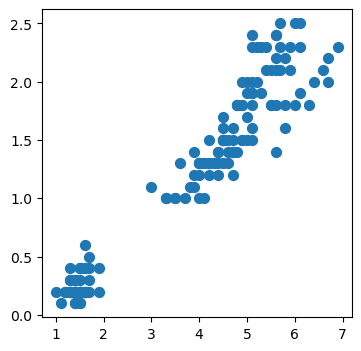

In [12]:
# SLとSWの散布図
#plt.scatter(SL, SW)
#plt.xlabel('SL', fontsize=14)
#plt.show()

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(PL, PW, s=50)
plt.show()

## 層別

In [13]:
# 種類で分ける
Sp==0
print(SL)
print(SL[Sp==0])

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]


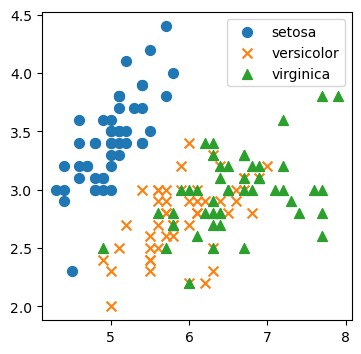

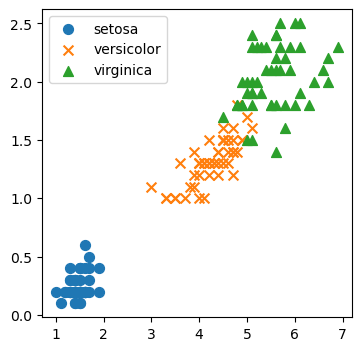

In [14]:
# 種類ごとに描画
markers = ['o', 'x', '^']
fig, ax = plt.subplots(figsize=(4, 4))
for i in range(3):
    ax.scatter(SL[Sp==i], SW[Sp==i], 
               s=50, marker=markers[i], label='%s'%iris.target_names[i])
#ax.scatter(SL[Sp==1], SW[Sp==1], s=50, marker='x', label='%s'%iris.target_names[1])
#ax.scatter(SL[Sp==2], SW[Sp==2], s=50, marker='^', label='%s'%iris.target_names[2])
ax.legend(fontsize=10)
plt.show()

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(PL[Sp==0], PW[Sp==0], s=50, marker='o', label='%s'%iris.target_names[0])
ax.scatter(PL[Sp==1], PW[Sp==1], s=50, marker='x', label='%s'%iris.target_names[1])
ax.scatter(PL[Sp==2], PW[Sp==2], s=50, marker='^', label='%s'%iris.target_names[2])
ax.legend(fontsize=10)
plt.show()

## マルチプロット

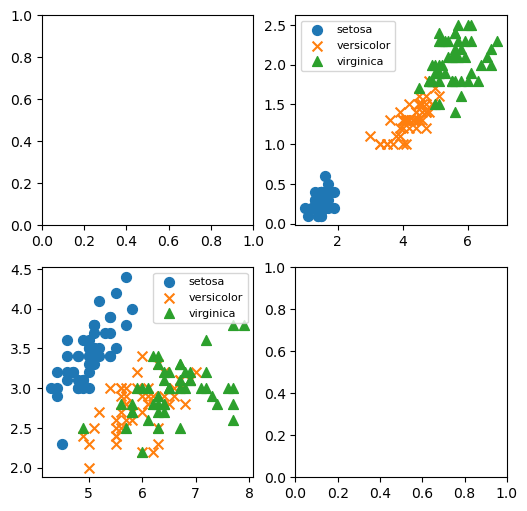

In [15]:
# 種類ごとに描画

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))
ax[1, 0].scatter(SL[Sp==0], SW[Sp==0], s=50, marker='o', label='%s'%iris.target_names[0])
ax[1, 0].scatter(SL[Sp==1], SW[Sp==1], s=50, marker='x', label='%s'%iris.target_names[1])
ax[1, 0].scatter(SL[Sp==2], SW[Sp==2], s=50, marker='^', label='%s'%iris.target_names[2])
ax[1, 0].legend(fontsize=8)

ax[0, 1].scatter(PL[Sp==0], PW[Sp==0], s=50, marker='o', label='%s'%iris.target_names[0])
ax[0, 1].scatter(PL[Sp==1], PW[Sp==1], s=50, marker='x', label='%s'%iris.target_names[1])
ax[0, 1].scatter(PL[Sp==2], PW[Sp==2], s=50, marker='^', label='%s'%iris.target_names[2])
ax[0, 1].legend(fontsize=8)
plt.show()

## ついに線形回帰

-0.061884797964144124 3.418946836103816


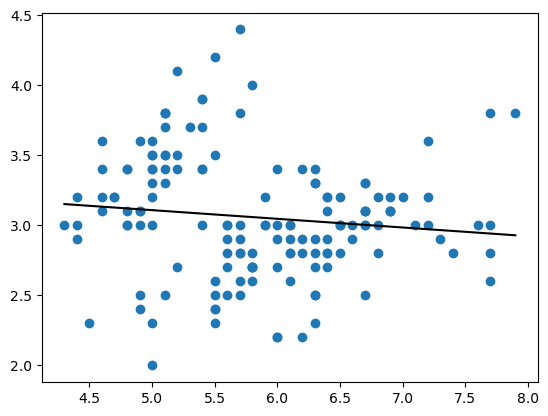

In [16]:
# 線形回帰
# <y> = a<x> + b
a = np.cov(SL, SW, bias=True)[0, 1] / np.var(SL)
b = np.mean(SW) - a * np.mean(SL)
print(a, b)

x1 = np.min(SL)
x2 = np.max(SL)
plt.scatter(SL, SW)
plt.plot([x1, x2], [a*x1+b, a*x2+b], c='k')

## 決定係数

In [17]:
# 決定係数
S = np.sum( (SW - np.mean(SW))**2 ); print(S)

# SW の回帰値
SWhat = a*SL + b
SR = np.sum( (SWhat - np.mean(SWhat))**2 ); print(SR)

# 決定係数 R^2
SR / S

28.306933333333333
0.3912769492612951


0.013822654141080692

## 層別に線形回帰しよう

0.7985283006471533 -0.5694326730396497
0.319719345548134 0.8721459648262768
0.23189049503351356 1.4463054187192133


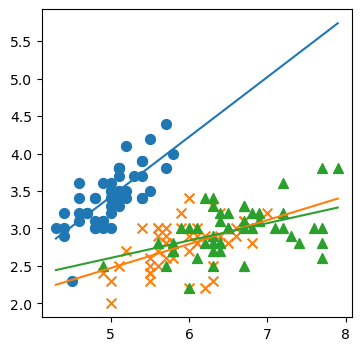

In [18]:
# 層別回帰
a = np.zeros(3)
b = np.zeros(3)
for i in range(3):
    a[i] = np.cov(SL[Sp==i], SW[Sp==i], bias=True)[0, 1] / np.var(SL[Sp==i])
    b[i] = np.mean(SW[Sp==i]) - a[i] * np.mean(SL[Sp==i])
    print(a[i], b[i])

x1, x2 = np.min(SL), np.max(SL)
colors = ['tab:blue', 'tab:orange', 'tab:green']
fig, ax = plt.subplots(figsize=(4, 4))
for i in range(3):
    ax.scatter(SL[Sp==i], SW[Sp==i], 
               s=50, marker=markers[i], label='%s'%iris.target_names[i])
    ax.plot([x1, x2], [a[i]*x1+b[i], a[i]*x2+b[i]], c=colors[i])

## 層別の決定係数

In [19]:
for i in range(3):
    # 決定係数
    S = np.sum( (SW[Sp==i] - np.mean(SW[Sp==i]))**2 )

    # SW の回帰値
    SWhat = a[i]*SL[Sp==i] + b[i]
    SR = np.sum( (SWhat - np.mean(SWhat))**2 )

    # 決定係数 R^2
    print(SR / S)

0.5513755803923133
0.2765820825529348
0.20905727608452862


## scikit-learn を使おう

簡単な学習モデルは scikit-learn で十分！

In [20]:
# 配列の reshape
np.arange(12).reshape(3, 4)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
print(SL.shape)
print(SL.reshape(-1, 1).shape)

(150,)
(150, 1)


## 線形回帰モデル

インスタンス化・学習たったこれだけ

In [22]:
## 各係数
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(SL.reshape(-1, 1), SW)
print(reg.coef_[0])
print(reg.intercept_)

-0.061884797964144145
3.418946836103816


## 決定係数

In [23]:
for i in range(3):
    reg.fit(SL[Sp==i].reshape(-1, 1), SW[Sp==i])
    print(reg.coef_[0], reg.intercept_)

0.7985283006471532 -0.5694326730396493
0.3197193455481342 0.8721459648262759
0.23189049503351372 1.4463054187192121


### 上での計算結果と確認

0.7985283006471533 -0.5694326730396497 

0.319719345548134 0.8721459648262768  

0.23189049503351356 1.4463054187192133


In [24]:
# 各スコア
for i in range(3):
    reg.fit(SL[Sp==i].reshape(-1, 1), SW[Sp==i])
    print(reg.score(SL[Sp==i].reshape(-1, 1), SW[Sp==i]))

0.5513755803923136
0.27658208255293526
0.20905727608452862


## 重線形回帰

### 3次元プロット

3次元描画の場合は inline ではなく notebook の形式を用いる方が良い

<IPython.core.display.Javascript object>


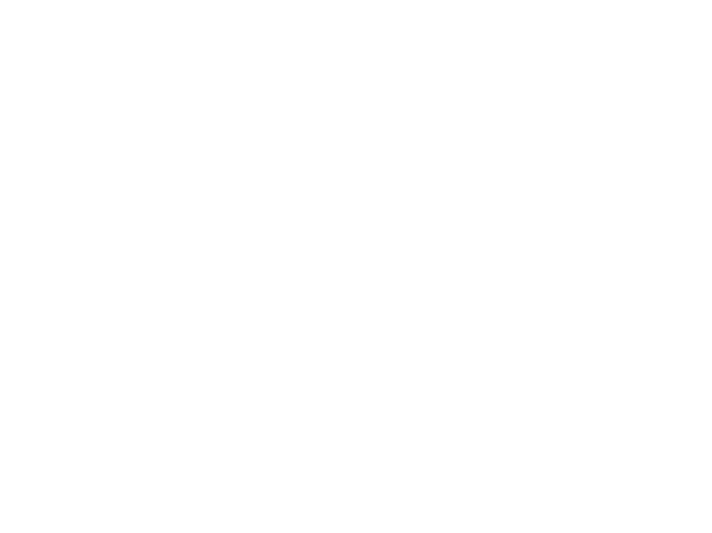

In [25]:
%matplotlib notebook
# %matplotlib inline
# 3次元描画
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(3):
    ax.scatter3D(SL[Sp==i], SW[Sp==i], PL[Sp==i])


## 重線形回帰

In [35]:
#重線形回帰
# PL = a0 + a1*SL + a2*SW
regM = LinearRegression()

X = iris.data[:, 0:2]
print(X.shape)

regM.fit(X, PL)
print(regM.coef_, regM.intercept_)
a1, a2 = regM.coef_[0:2]
a0 = regM.intercept_

x = np.arange(np.min(SL), np.max(SL)+0.01, 0.25)
y = np.arange(np.min(SW), np.max(SW)+0.01, 0.5)
x, y = np.meshgrid(x, y)
z = a0 + a1*x + a2*y
z.shape

(150, 2)
[ 1.77559255 -1.33862329] -2.524761511833407


(5, 15)

<IPython.core.display.Javascript object>


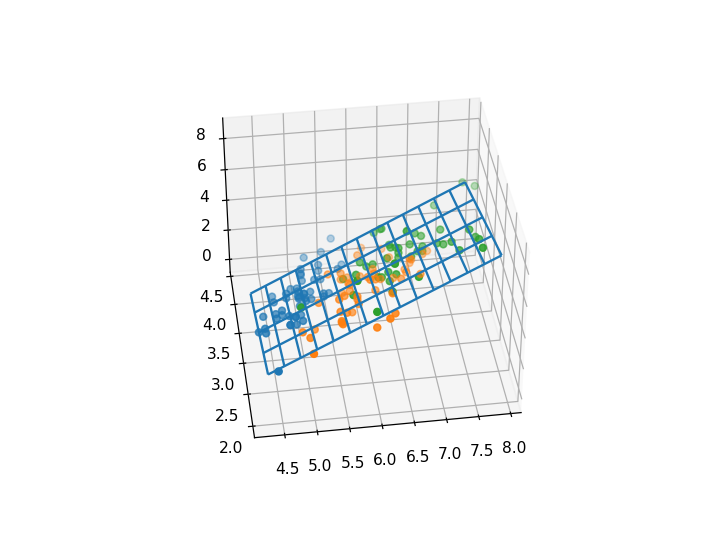

In [36]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(3):
    ax.scatter3D(SL[Sp==i], SW[Sp==i], PL[Sp==i])

ax.plot_wireframe(x, y, z)

<h3><div style="text-align: right;">以上</div></h3>